In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale

In [131]:
df = pd.read_csv("Data/raw_data.csv", index_col=0)

df.drop("video_favoriteCount", axis=1, inplace=True)

df.head()

,title,published_at,subscriberCount,videoCount,viewCount,video_published_date,video_commentCount,video_viewCount,video_likeCount,video_dislikeCount,video_id,likesVSsubs,viewsVSsubs,likesVSviews
0,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-03-03T03:29:19.000Z,152,14243,422,265,w-FO8lGpyBE,0.000055,0.001843,0.011023
1,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-02-26T18:22:26.000Z,105,38774,1003,52,5UZ1WNxbUj4,0.000130,0.005016,0.024527
2,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-02-11T18:13:12.000Z,95,42334,1445,43,ZgqcvqZnKCY,0.000187,0.005477,0.033118
3,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-01-30T18:24:55.000Z,105,35996,772,111,wO0a2C6PqtY,0.000100,0.004657,0.018363
4,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-01-21T18:14:09.000Z,77,48912,1101,54,9K5z_kYd6Sg,0.000142,0.006328,0.021406


In [122]:
 def compute_features(df):
    df_copy = df.copy()
    df_copy['likesVSsubs'] = df_copy['video_likeCount']/df_copy['subscriberCount']
    df_copy['viewsVSsubs'] = df_copy['video_viewCount']/df_copy['subscriberCount']
    df_copy['likesVSviews'] = (df_copy['video_likeCount'])/df_copy['video_viewCount']

    #df_copy = df_copy[(df_copy['likesVSsubs']<1) & (df_copy['likesVSsubs']>0)]
    #df_copy = df_copy[(df_copy['viewsVSsubs']<1) & (df_copy['viewsVSsubs']>0)]
    #df_copy = df_copy[(df_copy['likesVSviews']<1) & (df_copy['likesVSviews']>0)]

    #df_copy['log_likesVSsubs'] = np.log(df_copy['likesVSsubs'])
    #df_copy['log_viewsVSsubs'] = np.log(df_copy['viewsVSsubs'])
    #df_copy['log_likesVSviews'] = np.log(df_copy['likesVSviews'])
    return df_copy

df_copy = compute_features(df)
df_copy = df_copy[df_copy["likesVSviews"]<=0.15]
#df_copy.describe()

/Users/prabhjotsingh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


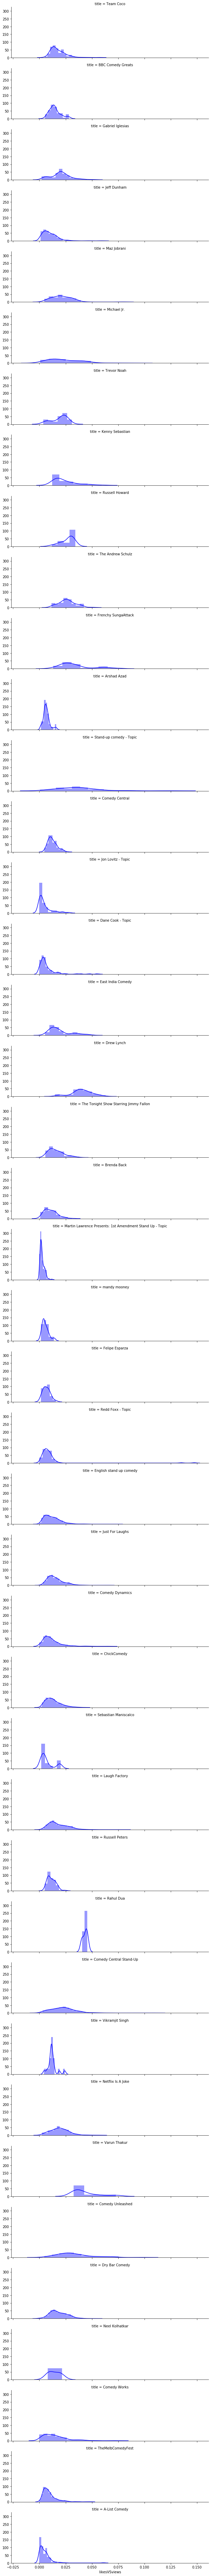

In [123]:
g = sns.FacetGrid(df_copy, row="title", height=2.5, aspect=3.5)
g.map(sns.distplot, "likesVSviews", color="blue");

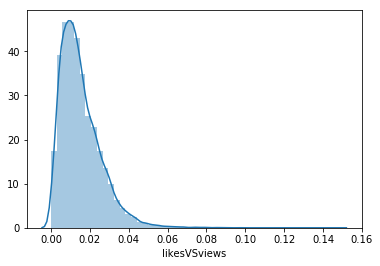

In [124]:
sns.distplot(df_copy['likesVSviews'])

In [125]:
# df_copy['subscriberCountNorm'] = MinMaxScaler().fit_transform(df_copy['subscriberCount'].values.reshape(-1,1))
# df_copy['video_viewCountNorm'] = MinMaxScaler().fit_transform(df_copy['video_viewCount'].values.reshape(-1,1))
# df_copy['likesVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['likesVSsubs'].values.reshape(-1,1))
# df_copy['viewsVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['viewsVSsubs'].values.reshape(-1,1))
# df_copy['log_likesVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['log_likesVSsubs'].values.reshape(-1,1))
# df_copy['log_viewsVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['log_viewsVSsubs'].values.reshape(-1,1))
# df_copy['popularity'] = 0.3*df_copy['viewsVSsubsNorm']+0.7*df_copy['likesVSsubsNorm']
# df_copy['log_popularity'] = np.log(0.3*df_copy['viewsVSsubsNorm']+0.7*df_copy['likesVSsubsNorm'])

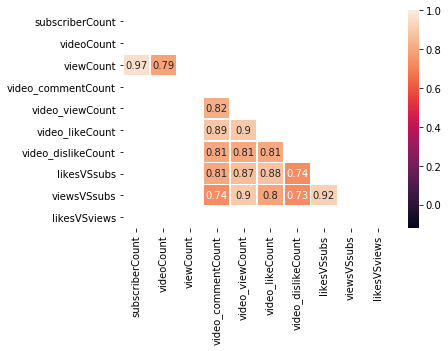

In [126]:
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[corr<0.7] = True
sns.heatmap(corr, linewidths=.5, mask=mask, annot=True)